In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [50]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ziya07/employee-attrition-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/ziya07/employee-attrition-prediction-dataset/versions/1


In [51]:
df=pd.read_csv(path+ '/employee_attrition_dataset.csv')
df

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Female,Married,IT,Manager,1,15488,28,15,...,No,6,54,17,4,4,4,20,3,No
1,2,48,Female,Married,Sales,Assistant,5,13079,28,6,...,Yes,2,45,1,4,1,2,25,2,No
2,3,34,Male,Married,Marketing,Assistant,1,13744,24,24,...,Yes,6,34,2,3,4,4,45,3,No
3,4,27,Female,Divorced,Marketing,Manager,1,6809,26,10,...,No,9,48,18,2,3,1,35,3,No
4,5,40,Male,Divorced,Marketing,Executive,1,10206,52,29,...,No,3,33,0,4,1,3,44,3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,27,Female,Divorced,HR,Analyst,2,4172,76,24,...,No,4,46,10,3,1,4,24,4,No
996,997,47,Male,Single,IT,Manager,4,11007,71,19,...,Yes,7,36,16,3,2,4,39,3,Yes
997,998,50,Female,Divorced,IT,Executive,1,4641,43,25,...,Yes,1,46,9,2,3,3,33,2,No
998,999,28,Female,Married,HR,Executive,4,19855,92,13,...,No,4,52,17,4,1,4,41,4,No


In [52]:
df["Attrition"].value_counts()

,count
Attrition,
No,811
Yes,189


In [53]:
df.isna().sum()

,0
Employee_ID,0
Age,0
Gender,0
Marital_Status,0
Department,0
Job_Role,0
Job_Level,0
Monthly_Income,0
Hourly_Rate,0
Years_at_Company,0


In [54]:
df.dtypes

,0
Employee_ID,int64
Age,int64
Gender,object
Marital_Status,object
Department,object
Job_Role,object
Job_Level,int64
Monthly_Income,int64
Hourly_Rate,int64
Years_at_Company,int64


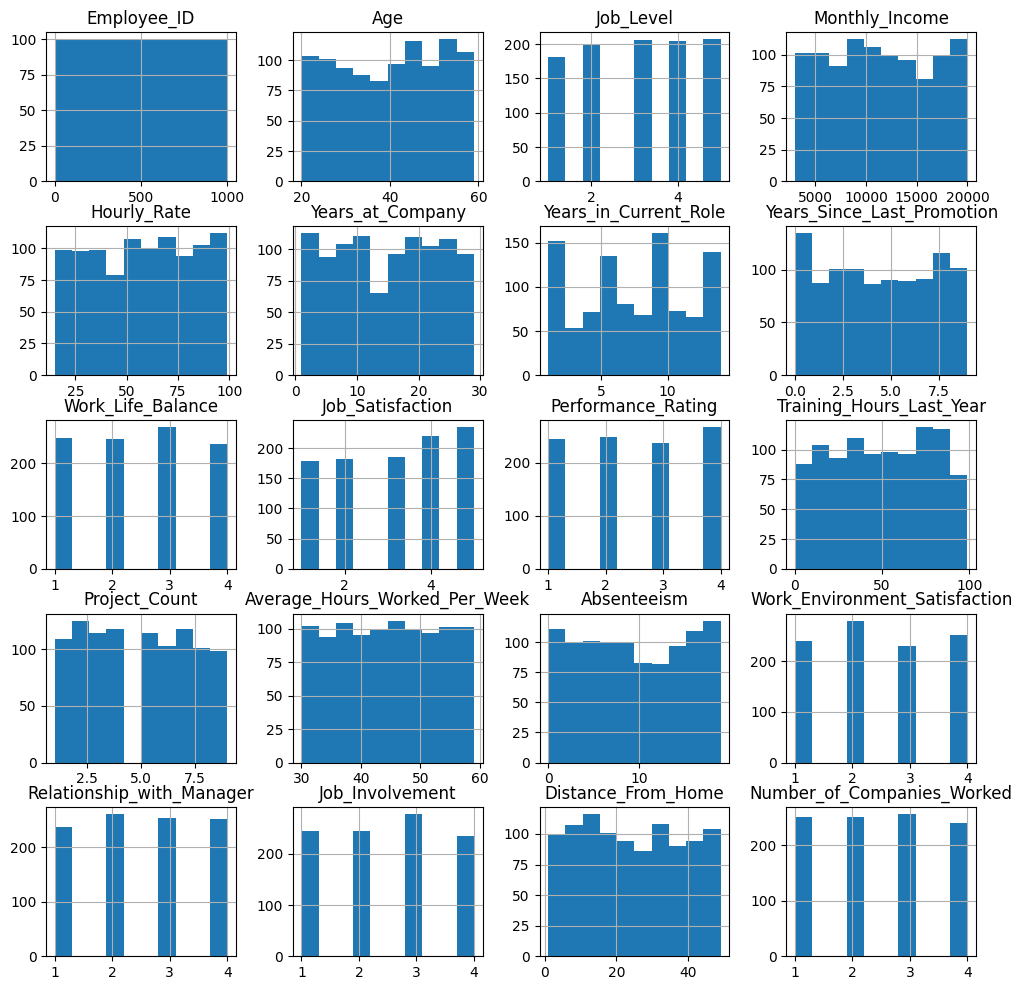

In [55]:
df.hist(figsize=(12,12));

In [56]:
X=df.drop(['Attrition','Employee_ID'], axis=1)
y=df['Attrition'].copy()

In [57]:
from sklearn.preprocessing import  PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler

In [58]:
X_train,X_test, y_train, y_test= train_test_split( X,y, random_state=42)
cat_features= X_train.select_dtypes( exclude=[np.number]).columns
num_features= X_train.select_dtypes( include=[np.number]).columns

In [59]:
cat_features

Index(['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Overtime'], dtype='object')

In [60]:
num_features

Index(['Age', 'Job_Level', 'Monthly_Income', 'Hourly_Rate', 'Years_at_Company',
       'Years_in_Current_Role', 'Years_Since_Last_Promotion',
       'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating',
       'Training_Hours_Last_Year', 'Project_Count',
       'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked'],
      dtype='object')

# RandomForestClassifier

***RandomForestClassifier (SMOTE)***

In [61]:
cat_pipeline=Pipeline ([
    ('imput',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False)),
])


num_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])


transformer=ColumnTransformer([
    ('cut', cat_pipeline, cat_features),
    ('num', num_pipeline,num_features)
], remainder='passthrough')


estimator=RandomForestClassifier(random_state=42)


full_pipeline=ImbPipeline([

    ('preprocessing', transformer),
    ('smote', SMOTE( random_state=42)),
    ('estimator',estimator)
])


full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cut',
                                                  Pipeline(steps=[('imput',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Overtime'], dtype='object')),
                                                 ('num',
                                                  Pipelin...
       'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating',
       'Training_Hours_Last_Year', 'Project_Count',
       'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('estimator', RandomForestClassifier(random_state=42))])

In [62]:
full_pipeline.score( X_test,y_test)

0.844

In [63]:
full_pipeline.score( X_train,y_train)

1.0

***RandomForestClassifier ( Under-sampling)***

In [64]:
cat_pipeline=Pipeline ([
    ('imput',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False)),
])


num_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])


transformer=ColumnTransformer([
    ('cut', cat_pipeline, cat_features),
    ('num', num_pipeline,num_features)
], remainder='passthrough')


estimator=RandomForestClassifier(random_state=42)


full_pipeline=ImbPipeline([
    ('preprocessing', transformer),
    ('under_sampler', RandomUnderSampler( random_state=42)),
    ('estimator',estimator)
])

full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cut',
                                                  Pipeline(steps=[('imput',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Overtime'], dtype='object')),
                                                 ('num',
                                                  Pipelin...
       'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating',
       'Training_Hours_Last_Year', 'Project_Count',
       'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked'],
      dtype='object'))])),
                ('under_sampler', RandomUnderSampler(random_state=42)),
                ('estimator', RandomForestClassifier(random_state=42))])

In [65]:
full_pipeline.score( X_train,y_train)

0.72

In [66]:
full_pipeline.score(X_test,y_test)

0.508

***RandomForestClassifier (GridSearch)***

In [67]:
cat_pipeline=ImbPipeline ([
    ('imput',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False)),
])


num_pipeline=ImbPipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])


transformer=ColumnTransformer([
    ('cut', cat_pipeline, cat_features),
    ('num', num_pipeline,num_features)
],   remainder='passthrough')


estimator=RandomForestClassifier(random_state=42)


full_pipeline=Pipeline([
    ('preprocessing', transformer),
    ('estimator',estimator)
])


params={
    'estimator__n_estimators': [100,120,130],
    'estimator__max_depth':[900,1000,1200,1400],
    'estimator__class_weight':['balanced'],
    'estimator__min_samples_leaf':[2,4,6]
}


grid_search=GridSearchCV(full_pipeline, params, n_jobs=-1)


grid_search.fit(X_train,y_train)
grid_search.score(X_train,y_train)

1.0

In [68]:
grid_search.score(X_test,y_test)

0.848

In [69]:
grid_search.best_score_

0.7986666666666667

In [70]:
grid_search.best_params_

{'estimator__class_weight': 'balanced',
 'estimator__max_depth': 900,
 'estimator__min_samples_leaf': 2,
 'estimator__n_estimators': 100}

***Bagging***

In [71]:
from sklearn.ensemble import BaggingClassifier
cat_pipeline=Pipeline ([
    ('imput',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False)),
])


num_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])


transformer=ColumnTransformer([
    ('cut', cat_pipeline, cat_features),
    ('num', num_pipeline,num_features)
], remainder='passthrough')


estimator=BaggingClassifier(RandomForestClassifier( n_estimators=100,
                                                   max_depth=900,
                                                    class_weight='balanced',
                                                    min_samples_leaf=2))


full_pipeline=Pipeline([
    ('preprocessing', transformer),
    ('estimator',estimator)
])


full_pipeline.fit(X_train,y_train)
full_pipeline.score( X_train, y_train)

0.9013333333333333

In [72]:
full_pipeline.score( X_test,y_test)

0.848

# LogisticRegression

***LogisticRegression (SMOTE)***

In [73]:
cat_pipeline=Pipeline ([
    ('imput',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False)),
])


num_pipeline=Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])


transformer=ColumnTransformer([
    ('cut', cat_pipeline, cat_features),
    ('num',num_pipeline,num_features)
], remainder='passthrough')

estimator=LogisticRegression(random_state=42,penalty='l2',)


full_pipeline=ImbPipeline([
    ('preprpcessing', transformer),
    ('smote', SMOTE( random_state=42)),
    ('estimator',estimator)
])


full_pipeline.fit( X_train, y_train)

Pipeline(steps=[('preprpcessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cut',
                                                  Pipeline(steps=[('imput',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Overtime'], dtype='object')),
                                                 ('num',
                                                  Pipelin...
       'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating',
       'Training_Hours_Last_Year', 'Project_Count',
       'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('estimator', LogisticRegression(random_state=42))])

In [74]:
full_pipeline.score( X_test,y_test)

0.552

In [75]:
full_pipeline.score( X_train,y_train)

0.5706666666666667

***LogisticRegression (Under-sampling,polynomial features)***

In [76]:
cat_pipeline=Pipeline ([
    ('imput',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False)),
])


num_pipeline=Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])


transformer=ColumnTransformer([
    ('cut', cat_pipeline, cat_features),
    ('num', num_pipeline,num_features)
], remainder='passthrough')

estimator=LogisticRegression(random_state=42,penalty='l2')


full_pipeline=ImbPipeline([
    ('preprpcessing', transformer),
    ('under_sampler', RandomUnderSampler( random_state=42)),
    ('estimator',estimator)
])


full_pipeline.fit( X_train, y_train)

Pipeline(steps=[('preprpcessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cut',
                                                  Pipeline(steps=[('imput',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Overtime'], dtype='object')),
                                                 ('num',
                                                  Pipelin...
       'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating',
       'Training_Hours_Last_Year', 'Project_Count',
       'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked'],
      dtype='object'))])),
                ('under_sampler', RandomUnderSampler(random_state=42)),
                ('estimator', LogisticRegression(random_state=42))])

In [77]:
full_pipeline.score( X_train,y_train)

0.516

In [78]:
full_pipeline.score( X_test,y_test)

0.472

***LogisticRegression (GridSearch)***

In [79]:
cat_pipeline=Pipeline ([
    ('imput',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False)),
])


num_pipeline=Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])


transformer=ColumnTransformer([
    ('cut', cat_pipeline, cat_features),
    ('num', num_pipeline,num_features)
], remainder='passthrough')

estimator=LogisticRegression(random_state=42)


full_pipeline=Pipeline([
    ('preprpcessing', transformer),
    ('estimator',estimator)
])

params={'estimator__max_iter':[900,1000,1500,2000],
         'estimator__penalty':['l2'],
        'estimator__class_weight':['balanced'],
        'estimator__C':[0.01,0.1,1]
        }

grid_search=GridSearchCV(full_pipeline, params, error_score='raise')
grid_search.fit(X_train,y_train)

GridSearchCV(error_score='raise',
             estimator=Pipeline(steps=[('preprpcessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cut',
                                                                         Pipeline(steps=[('imput',
                                                                                          SimpleImputer(fill_value='Missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['Gender', 'Marital_Status', 'Department', 'Job_Role',...
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked'],
      dtype='object'))])),
                                       ('estimator',
                                        LogisticRegression(random_state=42))]),
             param_grid={'estimator__C': [0.01, 0.1, 1],
                         'estimator__class_weight': ['balanced'],
                         'estimator__max_iter': [900, 1000, 1500, 2000],
                         'estimator__penalty': ['l2']})

In [80]:
grid_search.score( X_train, y_train)

0.576

In [81]:
grid_search.score( X_test, y_test)

0.568

***LogisticRegressor ( Polynomial_features)***

In [82]:
cat_pipeline=Pipeline ([
    ('imput',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False)),
])


num_pipeline=Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])


transformer=ColumnTransformer([
    ('poly', PolynomialFeatures(degree=6,include_bias=False,order='C'), num_features),
    ('cut', cat_pipeline, cat_features),
    ('num',num_pipeline,num_features)
], remainder='passthrough')

estimator=LogisticRegression(random_state=42,penalty='l2')


full_pipeline=ImbPipeline([
    ('preprpcessing', transformer),
    ('estimator',estimator)
])


full_pipeline.fit( X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprpcessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('poly',
                                                  PolynomialFeatures(degree=6,
                                                                     include_bias=False),
                                                  Index(['Age', 'Job_Level', 'Monthly_Income', 'Hourly_Rate', 'Years_at_Company',
       'Years_in_Current_Role', 'Years_Since_Last_Promotion',
       'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating',
       'Training_Hours_L...
       'Years_in_Current_Role', 'Years_Since_Last_Promotion',
       'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating',
       'Training_Hours_Last_Year', 'Project_Count',
       'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked'],
      dtype='object'))])),
                ('estimator', LogisticRegression(random_state=42))])

In [83]:
full_pipeline.score( X_train,y_train)

0.7973333333333333

In [84]:
full_pipeline.score( X_test,y_test)

0.84

***Bagging***

In [85]:
from sklearn.ensemble import BaggingClassifier

cat_pipeline=Pipeline ([
    ('imput',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False)),
])


num_pipeline=Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])


transformer=ColumnTransformer([
    ('cut', cat_pipeline, cat_features),
    ('num', num_pipeline,num_features)
], remainder='passthrough')

estimator=BaggingClassifier(LogisticRegression(max_iter=900,
                                               class_weight='balanced',
                                               C=1),
                                               n_estimators=500,
                                               bootstrap=True,
                                               n_jobs=-1)
full_pipeline=Pipeline([
    ('preprpcessing', transformer),
    ('estimator',estimator)
])

full_pipeline.fit( X_train,y_train)

Pipeline(steps=[('preprpcessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cut',
                                                  Pipeline(steps=[('imput',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Overtime'], dtype='object')),
                                                 ('num',
                                                  Pipelin...
       'Training_Hours_Last_Year', 'Project_Count',
       'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked'],
      dtype='object'))])),
                ('estimator',
                 BaggingClassifier(estimator=LogisticRegression(C=1,
                                                                class_weight='balanced',
                                                                max_iter=900),
                                   n_estimators=500, n_jobs=-1))])

In [86]:
full_pipeline.score( X_test,y_test)

0.604

In [87]:
full_pipeline.score( X_train,y_train)

0.616

# SVC

***SVC(SMOTE)***

In [88]:
cat_pipeline=Pipeline ([
    ('imput',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])


num_pipeline=Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])


transformer=ColumnTransformer([
    ('cut', cat_pipeline, cat_features),
    ('num', num_pipeline,num_features)
], remainder='passthrough')



estimator=SVC(random_state=42)


full_pipeline=ImbPipeline([
    ('preprpcessing', transformer),
    ( 'smote', SMOTE(random_state=42)),
    ('estimator',estimator)
])


full_pipeline.fit( X_train,y_train)

Pipeline(steps=[('preprpcessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cut',
                                                  Pipeline(steps=[('imput',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Overtime'], dtype='object')),
                                                 ('num',
                                                  Pipelin...
       'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating',
       'Training_Hours_Last_Year', 'Project_Count',
       'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('estimator', SVC(random_state=42))])

In [89]:
full_pipeline.score( X_test,y_test)

0.792

In [90]:
full_pipeline.score( X_train,y_train)

0.9573333333333334

***SVC( Under-sampling)***

In [91]:
cat_pipeline=Pipeline ([
    ('imput',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])


num_pipeline=Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])


transformer=ColumnTransformer([
    ('cut', cat_pipeline, cat_features),
    ('num', num_pipeline,num_features)
], remainder='passthrough')



estimator=SVC(random_state=42)


full_pipeline=ImbPipeline([
    ('preprpcessing', transformer),
    ( 'under_samplig', RandomUnderSampler( random_state=42)),
    ('estimator',estimator)
])


full_pipeline.fit( X_train,y_train)

Pipeline(steps=[('preprpcessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cut',
                                                  Pipeline(steps=[('imput',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Overtime'], dtype='object')),
                                                 ('num',
                                                  Pipelin...
       'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating',
       'Training_Hours_Last_Year', 'Project_Count',
       'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked'],
      dtype='object'))])),
                ('under_samplig', RandomUnderSampler(random_state=42)),
                ('estimator', SVC(random_state=42))])

In [92]:
full_pipeline.score( X_test,y_test)

0.492

In [93]:
full_pipeline.score( X_train,y_train)

0.632

***SVC(kernel='poly')***

In [94]:
cat_pipeline=Pipeline([
    ('imput',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])


num_pipeline=Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])


transformer=ColumnTransformer([
    ('cut', cat_pipeline, cat_features),
    ('num', num_pipeline,num_features)
], remainder='passthrough')



estimator=SVC(random_state=42,kernel='poly',degree=3,gamma='scale',max_iter=-1)


full_pipeline=ImbPipeline([
    ('preprpcessing', transformer),
    ('estimator',estimator)
])


full_pipeline.fit( X_train,y_train)

Pipeline(steps=[('preprpcessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cut',
                                                  Pipeline(steps=[('imput',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Overtime'], dtype='object')),
                                                 ('num',
                                                  Pipelin...
       'Years_in_Current_Role', 'Years_Since_Last_Promotion',
       'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating',
       'Training_Hours_Last_Year', 'Project_Count',
       'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked'],
      dtype='object'))])),
                ('estimator', SVC(kernel='poly', random_state=42))])

In [95]:
full_pipeline.score(X_test,y_test)

0.844

In [96]:
full_pipeline.score(X_train,y_train)

0.8973333333333333

***SVC (GridSearch)***

In [97]:
cat_pipeline=Pipeline ([
    ('imput',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])


num_pipeline=Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])


transformer=ColumnTransformer([
    ('cut', cat_pipeline, cat_features),
    ('num', num_pipeline,num_features)
], remainder='passthrough')



estimator=SVC(random_state=42)


full_pipeline=Pipeline([
    ('preprpcessing', transformer),
    ('estimator',estimator)
])


params={'estimator__kernel':['rbf', 'poly'],
        'estimator__class_weight': ['balanced'],
        'estimator__degree':[2,3,4,5],
        'estimator__gamma':[2,3,4],
        'estimator__C':[0.001,0.01,0.1,1]
}

grid_search=GridSearchCV(full_pipeline, params, error_score='raise')
grid_search.fit(X_train,y_train)

GridSearchCV(error_score='raise',
             estimator=Pipeline(steps=[('preprpcessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cut',
                                                                         Pipeline(steps=[('imput',
                                                                                          SimpleImputer(fill_value='Missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['Gender', 'Marital_Status', 'Department', 'Job_Role',...
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked'],
      dtype='object'))])),
                                       ('estimator', SVC(random_state=42))]),
             param_grid={'estimator__C': [0.001, 0.01, 0.1, 1],
                         'estimator__class_weight': ['balanced'],
                         'estimator__degree': [2, 3, 4, 5],
                         'estimator__gamma': [2, 3, 4],
                         'estimator__kernel': ['rbf', 'poly']})

In [98]:
grid_search.score(X_train,y_train)

0.7986666666666666

In [99]:
grid_search.score(X_test,y_test)

0.848

***Bagging***

In [100]:
from sklearn.ensemble import BaggingClassifier

cat_pipeline=Pipeline([
    ('imput',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False)),
])


num_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])


transformer=ColumnTransformer([
    ('cut', cat_pipeline, cat_features),
    ('num', num_pipeline,num_features)
], remainder='passthrough')


estimator=BaggingClassifier(SVC(kernel='rbf',
                                degree=2,
                                gamma=2,
                                C=0.001),
                                n_estimators=500,
                                bootstrap=True,
                                n_jobs=-1)

full_pipeline=Pipeline([
    ('preprpcessing', transformer),
    ('estimator',estimator)
])

full_pipeline.fit( X_train,y_train)


Pipeline(steps=[('preprpcessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cut',
                                                  Pipeline(steps=[('imput',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Overtime'], dtype='object')),
                                                 ('num',
                                                  Pipelin...
       'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating',
       'Training_Hours_Last_Year', 'Project_Count',
       'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked'],
      dtype='object'))])),
                ('estimator',
                 BaggingClassifier(estimator=SVC(C=0.001, degree=2, gamma=2),
                                   n_estimators=500, n_jobs=-1))])

In [101]:
full_pipeline.score(X_test,y_test)

0.848

In [102]:
full_pipeline.score(X_train,y_train)

0.7986666666666666

# KNeighborsClassifier

***KNeighborsClassifier (GridSearch)***

In [103]:
cat_pipeline=Pipeline ([
    ('imput',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False)),
])


num_pipeline=Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])


transformer=ColumnTransformer([
    ('cut', cat_pipeline, cat_features),
    ('num', num_pipeline,num_features)
], remainder='passthrough')

estimator=KNeighborsClassifier()


full_pipeline=Pipeline([
    ('preprpcessing', transformer),
    ('estimator',estimator)
])


params={
    'estimator__n_neighbors':[5,6,7,8],
    'estimator__weights':['uniform', 'distance'],
    'estimator__leaf_size':[30,35,40,45],
    'estimator__algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search=GridSearchCV(full_pipeline, params )
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprpcessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cut',
                                                                         Pipeline(steps=[('imput',
                                                                                          SimpleImputer(fill_value='Missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Overtime'], dtype='o...
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked'],
      dtype='object'))])),
                                       ('estimator', KNeighborsClassifier())]),
             param_grid={'estimator__algorithm': ['auto', 'ball_tree',
                                                  'kd_tree', 'brute'],
                         'estimator__leaf_size': [30, 35, 40, 45],
                         'estimator__n_neighbors': [5, 6, 7, 8],
                         'estimator__weights': ['uniform', 'distance']})

In [104]:
grid_search.score(X_train,y_train)

0.7986666666666666

In [105]:
grid_search.score( X_test,y_test)

0.84

In [106]:
grid_search.best_params_

{'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__n_neighbors': 8,
 'estimator__weights': 'uniform'}

*Bagging*

In [107]:
cat_pipeline=Pipeline ([
    ('imput',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False)),
])


num_pipeline=Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])


transformer=ColumnTransformer([
    ('cut', cat_pipeline, cat_features),
    ('num', num_pipeline,num_features)
], remainder='passthrough')


estimator=estimator=BaggingClassifier(KNeighborsClassifier(
                                      n_neighbors=8,
                                      weights='uniform',
                                      leaf_size=30,
                                      algorithm='auto'))


full_pipeline=Pipeline([
    ('preprpcessing', transformer),
    ('estimator',estimator)
])


full_pipeline.fit( X_train,y_train)

Pipeline(steps=[('preprpcessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cut',
                                                  Pipeline(steps=[('imput',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Overtime'], dtype='object')),
                                                 ('num',
                                                  Pipelin...
       'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating',
       'Training_Hours_Last_Year', 'Project_Count',
       'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked'],
      dtype='object'))])),
                ('estimator',
                 BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=8)))])

In [108]:
full_pipeline.score(X_test,y_test)

0.836

In [109]:
full_pipeline.score(X_train,y_train)

0.7973333333333333

# Voting Classifier

In [110]:
cat_pipeline=Pipeline ([
    ('imput',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False)),
])


num_pipeline=Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])


transformer=ColumnTransformer([
    ('cut', cat_pipeline, cat_features),
    ('num', num_pipeline,num_features)
], remainder='passthrough')


voting_clf=VotingClassifier(
    estimators=[
               ('rf', RandomForestClassifier(random_state=42,
                                     max_depth=900,
                                     class_weight='balanced',
                                     min_samples_leaf=2)),

                ('svc', SVC(random_state=42,
                            kernel='rbf',
                            degree=2,C=0.001,
                            class_weight='balanced',
                            gamma=2,
                            probability=True)),

                ('knn', KNeighborsClassifier(n_neighbors=8,
                                            weights='uniform',
                                            leaf_size=30,
                                            algorithm= 'auto' ))
])


full_pipeline=Pipeline([
    ('preprpcessing', transformer),
    ('voting_classifier',voting_clf)
])

full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprpcessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cut',
                                                  Pipeline(steps=[('imput',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Overtime'], dtype='object')),
                                                 ('num',
                                                  Pipelin...
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked'],
      dtype='object'))])),
                ('voting_classifier',
                 VotingClassifier(estimators=[('rf',
                                               RandomForestClassifier(class_weight='balanced',
                                                                      max_depth=900,
                                                                      min_samples_leaf=2,
                                                                      random_state=42)),
                                              ('svc',
                                               SVC(C=0.001,
                                                   class_weight='balanced',
                                                   degree=2, gamma=2,
                                                   probability=True,
                                                   random_state=42)),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=8))]))])

In [111]:
# dict1['voting_test'] = full_pipeline.score(X_test,y_test)

In [112]:
full_pipeline.score(X_train,y_train)

0.8026666666666666

In [113]:
full_pipeline.score(X_test,y_test)

0.848

In [114]:
full_pipeline.steps[1][1].voting='soft'

In [115]:
# voting_clf.voting='soft'
full_pipeline.score(X_test,y_test)

0.848

In [116]:
full_pipeline.steps[1][1].named_estimators_.items()

dict_items([('rf', RandomForestClassifier(class_weight='balanced', max_depth=900,
                       min_samples_leaf=2, random_state=42)), ('svc', SVC(C=0.001, class_weight='balanced', degree=2, gamma=2, probability=True,
    random_state=42)), ('knn', KNeighborsClassifier(n_neighbors=8))])

In [117]:
voting_clf.estimators

[('rf',
  RandomForestClassifier(class_weight='balanced', max_depth=900,
                         min_samples_leaf=2, random_state=42)),
 ('svc',
  SVC(C=0.001, class_weight='balanced', degree=2, gamma=2, probability=True,
      random_state=42)),
 ('knn', KNeighborsClassifier(n_neighbors=8))]

# Bagging

 ***LogisticRegression***



In [118]:
from sklearn.ensemble import BaggingClassifier

cat_pipeline=Pipeline ([
    ('imput',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False)),
])


num_pipeline=Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])


transformer=ColumnTransformer([
    ('cut', cat_pipeline, cat_features),
    ('num', num_pipeline,num_features)
], remainder='passthrough')

estimator=BaggingClassifier(LogisticRegression(max_iter=900,
                                               class_weight='balanced',
                                               C=1),
                                               n_estimators=500,
                                               bootstrap=True,
                                               n_jobs=-1)
full_pipeline=Pipeline([
    ('preprpcessing', transformer),
    ('estimator',estimator)
])

full_pipeline.fit( X_train,y_train)


Pipeline(steps=[('preprpcessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cut',
                                                  Pipeline(steps=[('imput',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Overtime'], dtype='object')),
                                                 ('num',
                                                  Pipelin...
       'Training_Hours_Last_Year', 'Project_Count',
       'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked'],
      dtype='object'))])),
                ('estimator',
                 BaggingClassifier(estimator=LogisticRegression(C=1,
                                                                class_weight='balanced',
                                                                max_iter=900),
                                   n_estimators=500, n_jobs=-1))])

In [119]:
full_pipeline.score( X_train,y_train)

0.6146666666666667

In [120]:
full_pipeline.score( X_test,y_test)

0.604

***SCV***

In [121]:
from sklearn.ensemble import BaggingClassifier

cat_pipeline=Pipeline([
    ('imput',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False)),
])


num_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])


transformer=ColumnTransformer([
    ('cut', cat_pipeline, cat_features),
    ('num', num_pipeline,num_features)
], remainder='passthrough')


estimator=BaggingClassifier(SVC(kernel='rbf',
                                degree=2,
                                gamma=2,
                                C=0.001),
                                n_estimators=500,
                                bootstrap=True,
                                n_jobs=-1)

full_pipeline=Pipeline([
    ('preprpcessing', transformer),
    ('estimator',estimator)
])

full_pipeline.fit( X_train,y_train)


Pipeline(steps=[('preprpcessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cut',
                                                  Pipeline(steps=[('imput',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Overtime'], dtype='object')),
                                                 ('num',
                                                  Pipelin...
       'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating',
       'Training_Hours_Last_Year', 'Project_Count',
       'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked'],
      dtype='object'))])),
                ('estimator',
                 BaggingClassifier(estimator=SVC(C=0.001, degree=2, gamma=2),
                                   n_estimators=500, n_jobs=-1))])

In [122]:
full_pipeline.score( X_train,y_train)

0.7986666666666666

In [47]:
full_pipeline.score( X_test,y_test)

0.848

***KN***

In [48]:
cat_pipeline=Pipeline ([
    ('imput',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False)),
])


num_pipeline=Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])


transformer=ColumnTransformer([
    ('cut', cat_pipeline, cat_features),
    ('num', num_pipeline,num_features)
], remainder='passthrough')


estimator=estimator=BaggingClassifier(KNeighborsClassifier(
                                      n_neighbors=8,
                                      weights='uniform',
                                      leaf_size=30,
                                      algorithm='auto'))


full_pipeline=Pipeline([
    ('preprpcessing', transformer),
    ('estimator',estimator)
])


full_pipeline.fit( X_train,y_train)

Pipeline(steps=[('preprpcessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cut',
                                                  Pipeline(steps=[('imput',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Overtime'], dtype='object')),
                                                 ('num',
                                                  Pipelin...
       'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating',
       'Training_Hours_Last_Year', 'Project_Count',
       'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked'],
      dtype='object'))])),
                ('estimator',
                 BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=8)))])

In [123]:
full_pipeline.score( X_train,y_train)

0.7986666666666666

In [124]:
full_pipeline.score( X_test,y_test)

0.848

***RandomForestClassifier***

In [125]:
cat_pipeline=Pipeline ([
    ('imput',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False)),
])


num_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])


transformer=ColumnTransformer([
    ('cut', cat_pipeline, cat_features),
    ('num', num_pipeline,num_features)
], remainder='passthrough')


estimator=BaggingClassifier(RandomForestClassifier( n_estimators=100,
                                                   max_depth=900,
                                                    class_weight='balanced',
                                                    min_samples_leaf=2))


full_pipeline=Pipeline([
    ('preprocessing', transformer),
    ('estimator',estimator)
])


full_pipeline.fit(X_train,y_train)
full_pipeline.score( X_train, y_train)

0.904

In [126]:
full_pipeline.score(X_test,y_test)

0.848